In [1]:
import matplotlib.pyplot as plt
from lmfit.models import ExpressionModel
import numpy as np

In [2]:
# calculate the fit result in a linspace x
def fit_function(x, result):
    a0 = result.params['a0'].value
    a1 = result.params['a1'].value
    a2 = result.params['a2'].value
    a3 = result.params['a3'].value
    function = np.exp(a0 + a1*np.log(x) + a2*np.log(x)**2 + a3*np.log(x)**3)
    return function


# calculate a trial fit function in a linspace x
def trial_fit(x, a0, a1, a2, a3):
    function = np.exp(a0 + a1*np.log(x) + a2*np.log(x)**2 + a3*np.log(x)**3)
    return function


# Find the index corresponding to a certain energy (lower bin) and the interpolated difference
def find_pos(energy_linspace, energy_point):
    index = 0
    while (energy_linspace[index] < energy_point):
        index += 1
        
    index -= 1
    interpolate = (energy_point - energy_linspace[index])/(energy_linspace[index + 1] - energy_linspace[index])
    return [index, interpolate]


# interpolate the value of the fit function (and the error region) for a specifc energy
def eff_point(energy_linspace, fit, lower, upper, energy):
    position = find_pos(energy_linspace, energy)
    bin_low = position[0]
    bin_high = bin_low + 1
    interpolate = position[1]
    
    value = fit[bin_low] + (fit[bin_high] - fit[bin_low])*interpolate
    low = lower[bin_low] + (lower[bin_high] - lower[bin_low])*interpolate
    high = upper[bin_low] + (upper[bin_high] - upper[bin_low])*interpolate
    
    return [value, low, high]

In [4]:
# Set the number of samples for the systematic error and the number of points for the linspace
N_randoms = 500
N_points = 500

# import the input for efficiency fits in 2d arrays: dimension 1 = source, dimension 2 = datapoint or error
arr_eff = np.array([[0.06464394302000162, 0.0824832, 0.0760593, 0.0649313, 0.061197], [0.11053805732230425, 0.0882007, 0.0652989, 0.0570151, 0.0575505, 0.0298475, 0.0271024, 0.0247721, 0.0228289, 0.021589, 0.0178684], [0.0191456, 0.017163]], dtype = 'object')
arr_E = np.array([[80.9979, 276.3989, 302.8508, 356.0129, 383.8485], [121.7817, 244.6974, 344.2785, 411.1165, 443.9606, 778.9045, 867.38, 964.057, 1085.837, 1112.076, 1408.013], [1173.228, 1332.492]], dtype = 'object')
arr_xerr = np.array([[0.0011, 0.0012, 0.0005, 0.0007, 0.0012], [0.0003, 0.0008, 0.0012, 0.0012, 0.0016, 0.0024, 0.003, 0.005, 0.01, 0.003, 0.003], [0.0015, 0.002]], dtype = 'object')
arr_yerr = np.array([[0.01775, 9.83638E-03, 8.73773E-03, 7.0423E-03, 7.34098E-03], [0.00529, 0.0102896, 7.06373E-03, 9.46763E-03, 7.37844E-03, 3.75467E-03, 3.70748E-03, 3.11823E-03, 3.89277E-03, 2.56202E-03, 1.87296E-03], [3.6E-03, 3.4E-03]], dtype = 'object')

# Diffent relative uncertainties, and plot labels/colors
source_relers = np.array([0.03, 0.048, 0.034])
source_names = np.array(["Ba133", "Eu152", "Co60"])
source_colors = np.array(['c', 'm', 'y'])

# Used fit model
mod = ExpressionModel("exp(a0 + a1*log(x) + a2*log(x)**2 + a3*log(x)**3)")

In [5]:
# Set the number of samples for the systematic error and the number of points for the linspace
N_randoms = 500
N_points = 500

# import the input for efficiency fits in 2d arrays: dimension 1 = source, dimension 2 = datapoint or error
arr_eff = np.array([[75], [69.3], [22], [17.5, 94, 12.7, 9.0], [66.1, 9.2], [0.47], [1.83]], dtype = 'object')
arr_E = np.array([[59.5409], [122.06065], [186.211], [276.3989, 80.9979, 302.8508, 356.0129], [121.7817, 344.2785], [1274.537], [661.657]], dtype = 'object')
arr_xerr = np.array([[0.0001], [0.00012], [0.013], [0.0012, 0.0011, 0.0005, 0.0007], [0.0003, 0.0012], [0.007], [0.003]], dtype = 'object')
arr_yerr = np.array([[2], [1.4], [3], [0.4, 3, 0.5, 0.2], [1.1, 0.4], [0.07], [0.07]], dtype = 'object')

# Diffent relative uncertainties, and plot labels/colors
source_relers = np.ones(7)*0.10
source_names = np.array(["Am241", "Co57", "Ra226", "Ba133", "Eu152", "Na22", "Cs137"])
source_colors = np.array(['r', 'g', 'b', 'c', 'm', 'y', 'k'])

# Used fit model
mod = ExpressionModel("exp(a0 + a1*log(x) + a2*log(x)**2 + a3*log(x)**3)")

In [6]:
# Flatten the arrays, perform the standard fit, and set the figure size
vec_E = np.array([])
vec_xerr = np.array([])
vec_yerr = np.array([])
vec_eff_stat = np.array([])
lower_sys = np.zeros(N_points)
upper_sys = np.zeros(N_points)

for i in range(len(arr_E)):                                 # Assign the unchanged values and uncertainties
    vec_E = np.append(vec_E, arr_E[i])
    vec_xerr = np.append(vec_xerr, arr_xerr[i])
    vec_yerr = np.append(vec_yerr, arr_yerr[i])
    vec_eff_stat = np.append(vec_eff_stat, arr_eff[i])

x = np.linspace(10**-5, max(vec_E), N_points)               # Perform a fit on the unchanged points
result_stat = mod.fit(vec_eff_stat, x = vec_E, a0 = 1, a1 = 10**-2, a2 = 10**-2, a3 = 10**-2, weights = 1/vec_yerr)
print(result_stat.fit_report())
plt.rcParams["figure.figsize"] = (15, 5)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 56
    # data points      = 11
    # variables        = 4
    chi-square         = 48.5137606
    reduced chi-square = 6.93053723
    Akaike info crit   = 24.3234743
    Bayesian info crit = 25.9150554
[[Variables]]
    a0: -41.9656934 +/- 7.14617534 (17.03%) (init = 1)
    a1:  25.8988468 +/- 4.11210924 (15.88%) (init = 0.01)
    a2: -4.56091659 +/- 0.78241722 (17.15%) (init = 0.01)
    a3:  0.24373644 +/- 0.04923911 (20.20%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, a3) = -0.998
    C(a1, a2) = -0.998
    C(a0, a1) = -0.998
    C(a1, a3) = 0.993
    C(a0, a2) = 0.993
    C(a0, a3) = -0.984


In [7]:
# Part for the fit with systematic error
fit_values = np.ones([N_randoms, N_points])
    
for i in range(N_randoms):                                  # Randomly shift the efficiencies according to the relative uncertainty on the calibration activities
    vec_eff = np.array([])
    for j in range(len(arr_eff)):
        source_spread = (np.random.normal(1, source_relers[j]))
        for k in range(len(arr_eff[j])):
            vec_eff = np.append(vec_eff, source_spread*arr_eff[j][k])
            
    result = mod.fit(vec_eff, x = vec_E, a0 = 1, a1 = 10**-2, a2 = 10**-2, a3 = 10**-2, weights = 1/vec_yerr)
    fit_values[i] = fit_function(x, result)
        

distribution = fit_values.T                                 # Get a list with all the values of the fit in x

# sort list --> 15.87% and 84.13% are +-1sigma
for i in range(N_points):                                   # Order the list to obtain +1 and -1 sigma values (15.87%; 84.13%)
    distr_inpoint = np.sort(distribution[i])
    lower_sys[i] = distr_inpoint[round(N_randoms * 0.1587)]
    upper_sys[i] = distr_inpoint[round(N_randoms * 0.8413)]

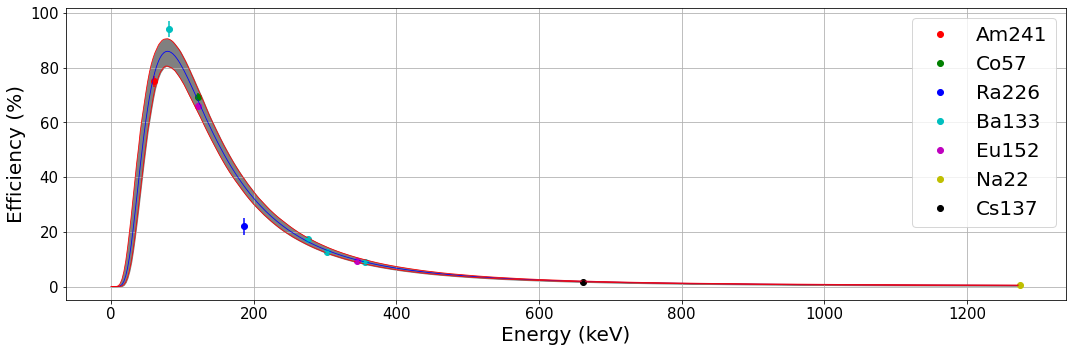

In [9]:
# Plot the datapoints
for i in range(len(arr_eff)):
    plt.plot(arr_E[i], arr_eff[i], 'o', color = source_colors[i], label = source_names[i])
    plt.errorbar(arr_E[i], arr_eff[i], xerr = arr_xerr[i], yerr = arr_yerr[i], fmt='.', color = source_colors[i])

# Use the fit result to get a linspace fit function
fit = fit_function(x, result_stat)

plt.plot(x, fit, color = 'b', linewidth = 0.8)     # Plot the fit
plt.plot(x, lower_sys, color = 'r', linewidth = 0.8)
plt.plot(x, upper_sys, color = 'r', linewidth = 0.8)
plt.fill_between(x, lower_sys, upper_sys, color = 'grey')   # Plot the systematic error region
plt.xlabel("Energy (keV)", size = 20)
plt.ylabel("Efficiency (%)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc = 'best', fontsize = 20)
plt.tight_layout()
plt.grid()
plt.show()

In [10]:
# Calculate the efficiency in a region of interest (returns value, lower systematic, upper systematic)
eff_200 = eff_point(x, fit, lower_sys, upper_sys, 200)
print(eff_200)

[32.20355432805835, 30.045283015404223, 34.54572519104984]


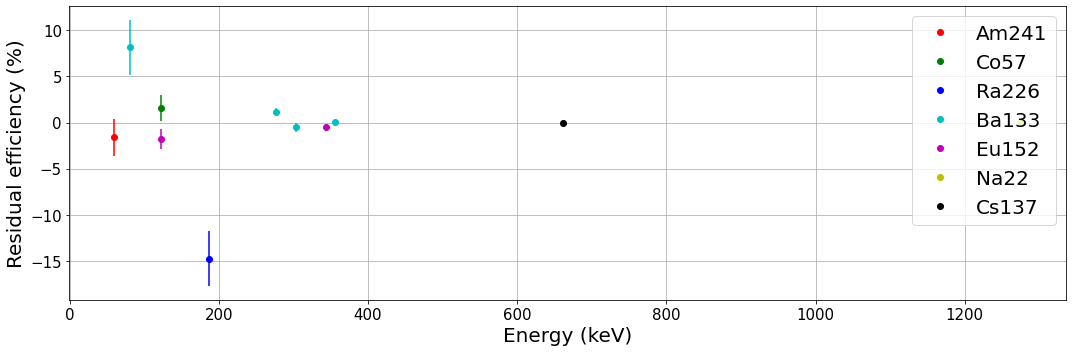

In [14]:
# Part for the absolute residuals
diff = vec_eff_stat - result_stat.best_fit
reldiff = 100 * diff/vec_eff_stat
pos = 0

for i in range(len(arr_eff)):
    size = len(arr_eff[i])
    plt.plot(arr_E[i], diff[pos:pos+size], 'o', color = source_colors[i], label = source_names[i])
    plt.errorbar(arr_E[i], diff[pos:pos+size], xerr = arr_xerr[i], yerr = arr_yerr[i], fmt='.', color = source_colors[i])
    pos += size
    

plt.ylabel("Residual efficiency (%)", fontsize = 20)
plt.xlabel("Energy (keV)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc = 'best', fontsize = 20)
plt.tight_layout()
plt.grid()
plt.show()

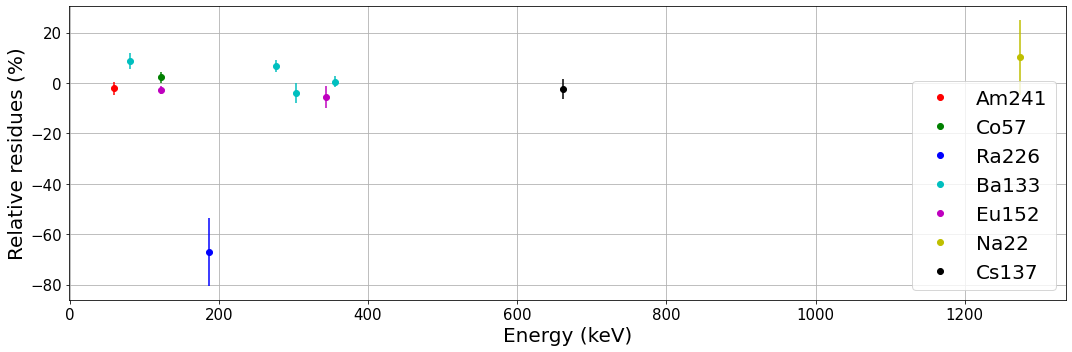

In [15]:
# Part for relative residuals, ~7.14% relative error expected for Ba133 81 keV if single fit was used
diff = vec_eff_stat - result_stat.best_fit
reldiff = 100 * diff/vec_eff_stat
pos = 0

for i in range(len(arr_eff)):
    size = len(arr_eff[i])
    yers_source = np.zeros(size)
    for j in range(size):
        yers_source[j] = 100 * arr_yerr[i][j]/arr_eff[i][j]
    
    plt.plot(arr_E[i], reldiff[pos:pos+size], 'o', color = source_colors[i], label = source_names[i])
    plt.errorbar(arr_E[i], reldiff[pos:pos+size], xerr = arr_xerr[i], fmt='.', color = source_colors[i], yerr = yers_source)
    pos += size
    
plt.ylabel("Relative residues (%)", fontsize = 20)
plt.xlabel("Energy (keV)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc = 'best', fontsize = 20)
plt.tight_layout()
plt.grid()
plt.show()

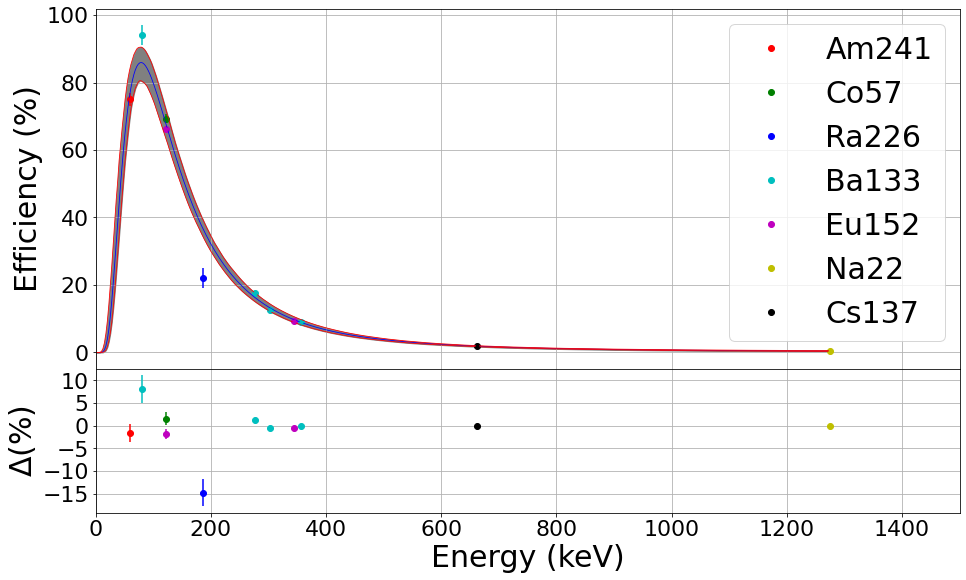

In [16]:
# Plot the fit and residues in a single figure
fig = plt.figure(1)
frame1=fig.add_axes((.1,.2+.4,.8,.6 +.4))
frame1.set_xticklabels([])


for i in range(len(arr_eff)):                               # Plot the datapoints
    plt.plot(arr_E[i], arr_eff[i], 'o', color = source_colors[i], label = source_names[i])
    plt.errorbar(arr_E[i], arr_eff[i], xerr = arr_xerr[i], yerr = arr_yerr[i], fmt='.', color = source_colors[i])

fit = fit_function(x, result_stat)
    
plt.plot(x, fit, color = 'b', linewidth = 0.8)              # Plot the fit
plt.plot(x, lower_sys, color = 'r', linewidth = 0.8)
plt.plot(x, upper_sys, color = 'r', linewidth = 0.8)
plt.fill_between(x, lower_sys, upper_sys, color = 'grey')   # Plot the systematic error region
plt.xlim([0, 1500])
plt.ylabel("Efficiency (%)", size = 30)
plt.yticks(size = 22)
plt.legend(loc = 'best', fontsize = 30)
plt.grid()



frame2=fig.add_axes((.1,.2,.8,.4)) 

diff = vec_eff_stat - result_stat.best_fit
reldiff = 100 * diff/vec_eff_stat
pos = 0

for i in range(len(arr_eff)):
    size = len(arr_eff[i])
    plt.plot(arr_E[i], diff[pos:pos+size], 'o', color = source_colors[i])
    plt.errorbar(arr_E[i], diff[pos:pos+size], xerr = arr_xerr[i], yerr = arr_yerr[i], fmt='.', color = source_colors[i])
    pos += size
    

plt.xlabel("Energy (keV)", size = 30)
plt.ylabel("$\Delta$(%)", size = 30)
plt.xlim([0, 1500])
plt.xticks(size = 22)
plt.yticks(size = 22)
plt.grid()
#plt.savefig('efficiency.pdf', bbox_inches='tight')
plt.show()